# Week 6: Foundations of Supervised Learning
## Machine Learning Fundamentals

**Author:** Shaahid Ahmed Nadeem 

---

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from ipywidgets import interact, IntSlider, FloatSlider, Dropdown
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully!")

Libraries imported successfully!


---
## 🎯 Part 1: What is Machine Learning?

### The Story of the Coffee Shop Owner

Imagine Sarah, who just opened a coffee shop. Every morning, she needs to decide how much coffee to brew. Too little, and customers leave disappointed. Too much, and she wastes expensive beans.

At first, Sarah **explicitly programs** her approach:
- "If it's Monday, brew 50 cups"
- "If it's raining, brew 30 cups"
- "If it's a holiday, brew 20 cups"

But this is tedious and doesn't capture all the patterns!

**Machine Learning Solution:** Instead of Sarah writing all the rules, she lets the computer discover patterns from past data:
- Weather conditions
- Day of the week
- Local events
- Previous sales

### The Key Difference:

**Traditional Programming:**
```
Data + Rules → Answers
```

**Machine Learning:**
```
Data + Answers → Rules
```

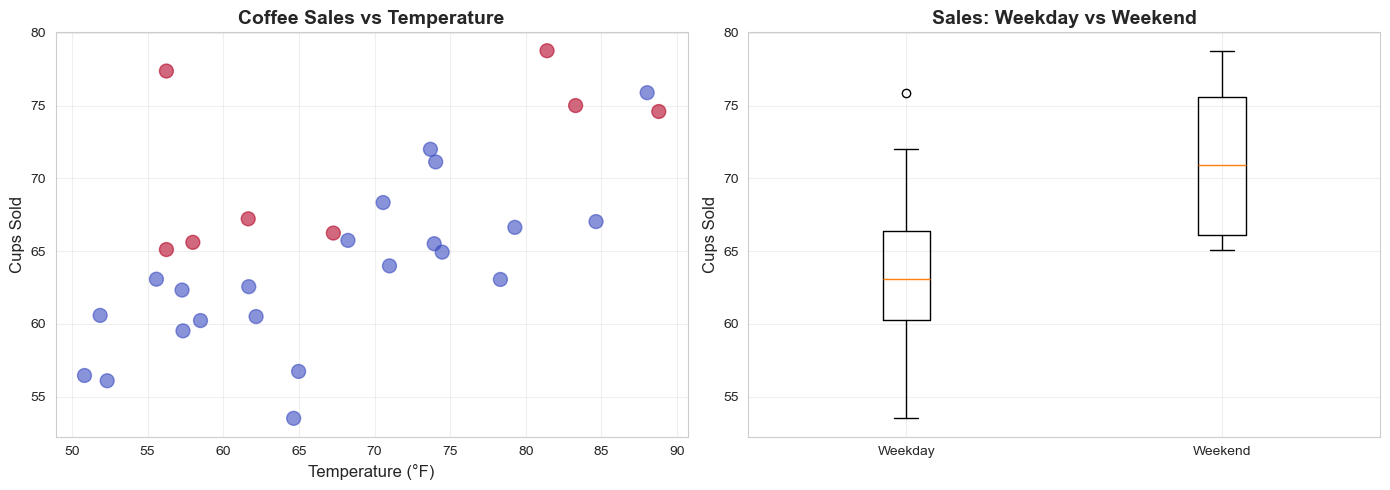

Average weekday sales: 63.4 cups
Average weekend sales: 71.2 cups
ML can learn these patterns automatically!


In [2]:
# Simulate coffee sales data
np.random.seed(42)

# Generate synthetic data
days = np.arange(1, 31)
temperature = np.random.uniform(50, 90, 30)
is_weekend = (days % 7 >= 5).astype(int)
cups_sold = 30 + 0.5 * temperature + 10 * is_weekend + np.random.normal(0, 5, 30)

# Visualize the data
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Cups vs Temperature
axes[0].scatter(temperature, cups_sold, alpha=0.6, s=100, c=is_weekend, cmap='coolwarm')
axes[0].set_xlabel('Temperature (°F)', fontsize=12)
axes[0].set_ylabel('Cups Sold', fontsize=12)
axes[0].set_title('Coffee Sales vs Temperature', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Weekend vs Weekday
weekend_sales = cups_sold[is_weekend == 1]
weekday_sales = cups_sold[is_weekend == 0]
axes[1].boxplot([weekday_sales, weekend_sales], tick_labels=['Weekday', 'Weekend'])
axes[1].set_ylabel('Cups Sold', fontsize=12)
axes[1].set_title('Sales: Weekday vs Weekend', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Average weekday sales: {weekday_sales.mean():.1f} cups")
print(f"Average weekend sales: {weekend_sales.mean():.1f} cups")
print(f"ML can learn these patterns automatically!")

---
## 📚 Part 2: Supervised Learning Setup

### The Teacher-Student Analogy

Think of supervised learning like a math teacher grading homework:

1. **Teacher gives problems** (input features: x)
2. **Students submit answers** (predictions: ŷ)
3. **Teacher has answer key** (true labels: y)
4. **Students learn from mistakes** (training process)

### Real-Life Example: Email Spam Filter

| Email Content (x) | Label (y) |
|------------------|--------|
| "You won $1M!" | Spam |
| "Meeting at 3pm" | Not Spam |
| "Click here NOW!" | Spam |
| "Dinner this Friday?" | Not Spam |

### Mathematical Framework

We have:
- **Training data:** {(x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)}
- **Input features:** x ∈ ℝᵈ (d-dimensional space)
- **Labels:** y ∈ Y (could be {0,1} for binary, or real numbers)

We want to learn:
```
f: X → Y
```

So that f(x) ≈ y for new, unseen examples!

In [3]:
# Simulate email spam classification
from sklearn.feature_extraction.text import CountVectorizer

# Sample emails
emails = [
    "Congratulations you won million dollars",
    "Meeting scheduled for tomorrow",
    "Click here for free prize",
    "Lunch plans this weekend",
    "Buy now limited time offer",
    "Project deadline reminder",
]

labels = [1, 0, 1, 0, 1, 0]  # 1 = Spam, 0 = Not Spam
label_names = ['Not Spam', 'Spam']

# Vectorize emails (convert to numbers)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Visualize feature extraction
feature_names = vectorizer.get_feature_names_out()
print("Email Features (words):")
print(feature_names[:10], "...\n")

# Show first email as example
print(f"Email: '{emails[0]}'")
print(f"Label: {label_names[labels[0]]}")
print(f"Feature Vector: {X[0].toarray()[0][:10]}... (showing first 10 features)")
print("\n Machine Learning transforms text → numbers → predictions!")

Email Features (words):
['buy' 'click' 'congratulations' 'deadline' 'dollars' 'for' 'free' 'here'
 'limited' 'lunch'] ...

Email: 'Congratulations you won million dollars'
Label: Spam
Feature Vector: [0 0 1 0 1 0 0 0 0 0]... (showing first 10 features)

 Machine Learning transforms text → numbers → predictions!


---
## 🎯 Part 3: Loss Functions & Evaluation

### The Archery Competition Story

Imagine three archers competing:
- **Alice** hits near the bullseye each time (accurate)
- **Bob** hits the same spot, but far from center (precise but biased)
- **Charlie** hits randomly everywhere (neither accurate nor precise)

A **loss function** measures how far your "arrows" (predictions) are from the "bullseye" (true values).

### Common Loss Functions

#### 1. **Squared Loss (L2 Loss)**
```
L(y, ŷ) = (y - ŷ)²
```
- Punishes large errors MUCH more
- Sensitive to outliers

**Practice Problem:** https://www.deep-ml.com/problems/71

#### 2. **Absolute Loss (L1 Loss)**
```
L(y, ŷ) = |y - ŷ|
```
- Linear penalty
- More robust to outliers

**Practice Problem:** https://www.deep-ml.com/problems/93

#### 3. **0-1 Loss (Classification)**
```
L(y, ŷ) = { 0 if y = ŷ, 1 if y ≠ ŷ }
```
- Binary: right or wrong
- No partial credit!
  
**Practice Problem:** https://www.deep-ml.com/problems/36

In [4]:
# Interactive Loss Function Comparison
def plot_loss_functions(true_value=300, show_outlier=False):
    predictions = np.linspace(200, 400, 100)
    
    # Calculate losses
    l1_loss = np.abs(predictions - true_value)
    l2_loss = (predictions - true_value) ** 2 / 100  # Scaled for visualization
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Loss curves
    axes[0].plot(predictions, l1_loss, label='L1 Loss (Absolute)', linewidth=2, color='blue')
    axes[0].plot(predictions, l2_loss, label='L2 Loss (Squared)', linewidth=2, color='red')
    axes[0].axvline(true_value, color='green', linestyle='--', label='True Value', linewidth=2)
    axes[0].set_xlabel('Predicted Value ($1000s)', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Loss Functions Comparison', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Example predictions
    example_preds = [280, 300, 320, 350, 400] if not show_outlier else [280, 300, 320, 350, 500]
    l1_losses = [abs(p - true_value) for p in example_preds]
    l2_losses = [(p - true_value)**2 / 100 for p in example_preds]
    
    x = np.arange(len(example_preds))
    width = 0.35
    
    axes[1].bar(x - width/2, l1_losses, width, label='L1 Loss', color='blue', alpha=0.7)
    axes[1].bar(x + width/2, l2_losses, width, label='L2 Loss', color='red', alpha=0.7)
    axes[1].set_xlabel('Prediction Examples', fontsize=12)
    axes[1].set_ylabel('Loss Value', fontsize=12)
    axes[1].set_title('Loss Comparison on Examples', fontsize=14, fontweight='bold')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels([f'${p}k' for p in example_preds])
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n True house price: ${true_value}k")
    print(f"\n Notice how L2 loss EXPLODES for large errors!")
    if show_outlier:
        print(f"  With outlier ($500k): L2 loss becomes {l2_losses[-1]:.1f} vs L1 loss {l1_losses[-1]:.1f}")

# Create interactive widget
interact(plot_loss_functions, 
         true_value=IntSlider(min=200, max=400, step=10, value=300, description='True Value ($k):'),
         show_outlier=False)

interactive(children=(IntSlider(value=300, description='True Value ($k):', max=400, min=200, step=10), Checkbo…

<function __main__.plot_loss_functions(true_value=300, show_outlier=False)>

### Expected Risk vs. Empirical Risk

**Expected Risk (True Error):**
```
R(f) = E[(y - f(x))²]
```
Average loss over ALL possible examples (unknown!)

**Empirical Risk (Training Error):**
```
R̂(f) = (1/n) Σᵢ₌₁ⁿ L(yᵢ, f(xᵢ))
```
Average loss over our n training examples (what we compute!)

---
## 👥 Part 4: k-Nearest Neighbors (k-NN)

### The New Kid in School Story

You're new in town and need to find friends. Your strategy:
1. Look at the 5 people closest to where you live (k=5 neighbors)
2. If 4 of them like video games, you probably will too!
3. If 3 of them play soccer, you might enjoy soccer!

This is exactly how k-NN works!

### The Algorithm

```
For a new point x_new:
1. Calculate distance to ALL training points
2. Find k closest neighbors
3. Classification: Take majority vote
   Regression: Take average of their y-values
```

### Distance Metric (Euclidean)
```
d(x, x') = √(Σᵢ₌₁ᵈ (xᵢ - x'ᵢ)²)
```

In [5]:
# Generate sample data for email classification
np.random.seed(42)

# Spam emails: high urgency words, high promotional words
spam_urgency = np.random.uniform(7, 10, 20)
spam_promo = np.random.uniform(6, 10, 20)

# Not spam emails: low urgency, low promotional
notspam_urgency = np.random.uniform(1, 4, 20)
notspam_promo = np.random.uniform(1, 5, 20)

# Combine data
X_train = np.vstack([
    np.column_stack([spam_urgency, spam_promo]),
    np.column_stack([notspam_urgency, notspam_promo])
])
y_train = np.array([1]*20 + [0]*20)  # 1=Spam, 0=Not Spam

print("Generated email dataset:")
print(f"   - {np.sum(y_train == 1)} spam emails")
print(f"   - {np.sum(y_train == 0)} not-spam emails")
print(f"   - Features: [urgency_words, promotional_words]")

Generated email dataset:
   - 20 spam emails
   - 20 not-spam emails
   - Features: [urgency_words, promotional_words]


In [6]:
# Interactive k-NN Visualization
def visualize_knn(k=3, test_urgency=5.0, test_promo=5.0):
    # Test point
    test_point = np.array([[test_urgency, test_promo]])
    
    # Calculate distances
    distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
    nearest_indices = np.argsort(distances)[:k]
    nearest_labels = y_train[nearest_indices]
    
    # Make prediction
    prediction = 1 if np.sum(nearest_labels) > k/2 else 0
    pred_name = 'SPAM' if prediction == 1 else 'NOT SPAM'
    
    # Plot
    plt.figure(figsize=(12, 8))
    
    # Plot training points
    spam_mask = y_train == 1
    plt.scatter(X_train[spam_mask, 0], X_train[spam_mask, 1], 
               c='red', s=100, alpha=0.6, label='Spam', edgecolors='black')
    plt.scatter(X_train[~spam_mask, 0], X_train[~spam_mask, 1], 
               c='blue', s=100, alpha=0.6, label='Not Spam', edgecolors='black')
    
    # Highlight k-nearest neighbors
    plt.scatter(X_train[nearest_indices, 0], X_train[nearest_indices, 1],
               s=300, facecolors='none', edgecolors='green', linewidths=3,
               label=f'{k} Nearest Neighbors')
    
    # Plot test point
    plt.scatter(test_point[0, 0], test_point[0, 1], 
               c='yellow', s=400, marker='*', edgecolors='black', linewidths=2,
               label='New Email (Test Point)', zorder=5)
    
    # Draw circles to nearest neighbors
    for idx in nearest_indices:
        plt.plot([test_point[0, 0], X_train[idx, 0]], 
                [test_point[0, 1], X_train[idx, 1]], 
                'g--', alpha=0.3, linewidth=1)
    
    plt.xlabel('Urgency Words (count)', fontsize=13)
    plt.ylabel('Promotional Words (count)', fontsize=13)
    plt.title(f'k-NN Classification (k={k})\nPrediction: {pred_name}', 
             fontsize=15, fontweight='bold')
    plt.legend(fontsize=11, loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 11)
    plt.ylim(0, 11)
    
    plt.tight_layout()
    plt.show()
    
    # Print details
    print(f"\n New Email Features:")
    print(f"   - Urgency words: {test_urgency}")
    print(f"   - Promotional words: {test_promo}")
    print(f"\n Found {k} nearest neighbors:")
    for i, idx in enumerate(nearest_indices):
        label_name = 'Spam' if y_train[idx] == 1 else 'Not Spam'
        print(f"   {i+1}. Distance: {distances[idx]:.2f}, Label: {label_name}")
    
    spam_count = np.sum(nearest_labels)
    print(f"\n Vote: {spam_count} spam, {k - spam_count} not-spam")
    print(f" Prediction: {pred_name}")

# Create interactive widget
interact(visualize_knn,
         k=IntSlider(min=1, max=15, step=2, value=3, description='k value:'),
         test_urgency=FloatSlider(min=0, max=10, step=0.5, value=5, description='Urgency:'),
         test_promo=FloatSlider(min=0, max=10, step=0.5, value=5, description='Promo:'))

interactive(children=(IntSlider(value=3, description='k value:', max=15, min=1, step=2), FloatSlider(value=5.0…

<function __main__.visualize_knn(k=3, test_urgency=5.0, test_promo=5.0)>

### Why k Matters

**k=1 (The Copycat):**
- Looks at only the closest neighbor
- Very sensitive to noise
- Like asking only your best friend for advice

**k=100 (The Crowd Follower):**
- Looks at many neighbors
- Very smooth, but might miss local patterns
- Like asking the entire school for advice

**k=5-10 (The Goldilocks):**
- Usually just right!
- Balances noise vs. pattern

**Practice Problem:** https://www.deep-ml.com/problems/173

In [7]:
# Demonstrate effect of k on decision boundary
from matplotlib.colors import ListedColormap

def plot_decision_boundary(k_value=3):
    # Create mesh
    h = 0.2
    x_min, x_max = -0.5, 10.5
    y_min, y_max = -0.5, 10.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Train k-NN
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)
    
    # Predict on mesh
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(10, 8))
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
    
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
               s=100, edgecolor='black', alpha=0.7)
    
    plt.xlabel('Urgency Words', fontsize=13)
    plt.ylabel('Promotional Words', fontsize=13)
    plt.title(f'k-NN Decision Boundary (k={k_value})', fontsize=15, fontweight='bold')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    # Add legend
    plt.scatter([], [], c='red', s=100, label='Spam Region', alpha=0.4)
    plt.scatter([], [], c='blue', s=100, label='Not-Spam Region', alpha=0.4)
    plt.legend(fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    if k_value == 1:
        print("  k=1: Very jagged boundary - overfitting to noise!")
    elif k_value > 10:
        print("  Large k: Very smooth boundary - might be too simple!")
    else:
        print(" Good k value: Balanced decision boundary!")

interact(plot_decision_boundary,
         k_value=IntSlider(min=1, max=15, step=1, value=3, description='k:'))

interactive(children=(IntSlider(value=3, description='k:', max=15, min=1), Output()), _dom_classes=('widget-in…

<function __main__.plot_decision_boundary(k_value=3)>

---
## ⚡ Part 5: Perceptron Algorithm

### The Bouncer at the Club

Imagine a bouncer deciding who gets into an exclusive club:

**Features:**
- x₁: Age (must be 21+)
- x₂: Dress code (1-10 scale)
- x₃: Invitation status (0 or 1)

The bouncer has a mental formula:
```
Score = w₁·age + w₂·dress + w₃·invitation + b
```

If Score > 0 → Let them in (ŷ = +1)  
If Score ≤ 0 → Turn them away (ŷ = -1)

### The Mathematical Model

**Linear Decision Boundary:**
```
f(x) = sign(w·x + b)
     = sign(w₁x₁ + w₂x₂ + ... + wₐxₐ + b)
```

### Perceptron Update Rule

When prediction is wrong (ŷ ≠ y):
```
w ← w + y·x
b ← b + y
```

**Intuition:**
- If you wrongly rejected someone (y=+1, ŷ=-1): Add their features to weights
- If you wrongly accepted someone (y=-1, ŷ=+1): Subtract their features from weights
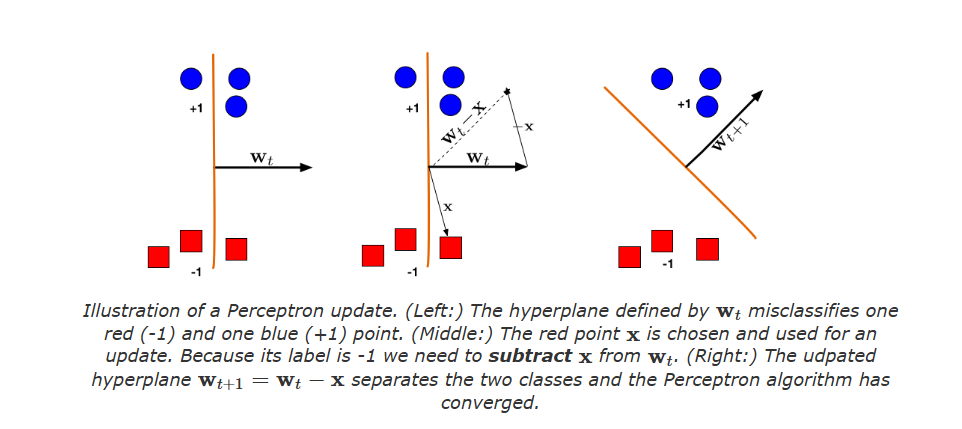


**Practice Problem:** https://www.deep-ml.com/problems/24

In [8]:
# Perceptron implementation
# y = mx + c -> y = wx + b
class Perceptron:
    def __init__(self):
        self.w = None
        self.b = 0
        self.history = []
    
    def predict(self, x):
        return np.sign(np.dot(self.w, x) + self.b)
    
    def train_step(self, x, y):
        if self.w is None:
            self.w = np.zeros(len(x))
        
        prediction = self.predict(x)
        
        # Save state before update
        self.history.append({
            'w': self.w.copy(),
            'b': self.b,
            'x': x,
            'y': y,
            'pred': prediction,
            'correct': prediction == y
        })
        
        # Update if wrong
        if prediction != y:
            self.w += y * x
            self.b += y
            return False  # Made an update
        return True  # Correct prediction

print("Perceptron class defined!")

Perceptron class defined!


In [9]:
# Generate linearly separable data
np.random.seed(42)

# Positive class
X_pos = np.random.randn(20, 2) + np.array([2, 2])
y_pos = np.ones(20)

# Negative class
X_neg = np.random.randn(20, 2) + np.array([-2, -2])
y_neg = -np.ones(20)

# Combine
X_perceptron = np.vstack([X_pos, X_neg])
y_perceptron = np.concatenate([y_pos, y_neg])

print(f"✅ Generated linearly separable dataset:")
print(f"   - {len(X_pos)} positive examples")
print(f"   - {len(X_neg)} negative examples")

✅ Generated linearly separable dataset:
   - 20 positive examples
   - 20 negative examples


In [10]:
# Train perceptron and visualize
perceptron = Perceptron()

print("🎓 Training Perceptron...\n")
print("="*60)

max_epochs = 10
for epoch in range(max_epochs):
    errors = 0
    for i, (x, y) in enumerate(zip(X_perceptron, y_perceptron)):
        correct = perceptron.train_step(x, y)
        if not correct:
            errors += 1
    
    print(f"Epoch {epoch + 1}: {errors} errors, w={perceptron.w}, b={perceptron.b:.2f}")
    
    if errors == 0:
        print(f"\n🎉 Converged after {epoch + 1} epochs!")
        break

print("="*60)

🎓 Training Perceptron...

Epoch 1: 1 errors, w=[2.49671415 1.8617357 ], b=1.00
Epoch 2: 0 errors, w=[2.49671415 1.8617357 ], b=1.00

🎉 Converged after 2 epochs!


In [11]:
# Interactive perceptron visualization
def visualize_perceptron_step(step=0):
    if step >= len(perceptron.history):
        step = len(perceptron.history) - 1
    
    state = perceptron.history[step]
    w = state['w']
    b = state['b']
    
    plt.figure(figsize=(12, 8))
    
    # Plot data points
    plt.scatter(X_pos[:, 0], X_pos[:, 1], c='blue', s=100, alpha=0.6, 
               label='Positive (+1)', edgecolors='black')
    plt.scatter(X_neg[:, 0], X_neg[:, 1], c='red', s=100, alpha=0.6, 
               label='Negative (-1)', edgecolors='black')
    
    # Highlight current point
    current_x = state['x']
    current_y = state['y']
    color = 'green' if state['correct'] else 'orange'
    plt.scatter(current_x[0], current_x[1], c=color, s=400, marker='*',
               edgecolors='black', linewidths=2, zorder=5,
               label='Current Point')
    
    # Plot decision boundary if weights are non-zero
    if np.any(w != 0):
        x_line = np.linspace(-5, 5, 100)
        # w1*x1 + w2*x2 + b = 0  =>  x2 = -(w1*x1 + b)/w2
        if w[1] != 0:
            y_line = -(w[0] * x_line + b) / w[1]
            plt.plot(x_line, y_line, 'g-', linewidth=3, label='Decision Boundary')
            
            # Plot normal vector (direction of w)
            origin = np.array([0, -b/w[1]]) if w[1] != 0 else np.array([-b/w[0], 0])
            plt.arrow(origin[0], origin[1], w[0]*0.5, w[1]*0.5, 
                     head_width=0.3, head_length=0.2, fc='purple', ec='purple',
                     linewidth=2, label='Weight Vector')
    
    plt.xlabel('Feature 1', fontsize=13)
    plt.ylabel('Feature 2', fontsize=13)
    plt.title(f'Perceptron Learning - Step {step + 1}/{len(perceptron.history)}\n' +
             f'w=[{w[0]:.2f}, {w[1]:.2f}], b={b:.2f}\n' +
             f'Prediction: {int(state["pred"])}, True: {int(current_y)} - ' +
             ('✓ Correct' if state['correct'] else '✗ Wrong, Updating!'),
             fontsize=14, fontweight='bold')
    plt.legend(fontsize=10, loc='upper right')
    plt.grid(True, alpha=0.3)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📍 Step {step + 1} Details:")
    print(f"   Current point: x = {current_x}")
    print(f"   True label: y = {int(current_y)}")
    print(f"   Prediction: ŷ = {int(state['pred'])}")
    print(f"   Score: w·x + b = {np.dot(w, current_x) + b:.2f}")
    
    if not state['correct']:
        new_w = w + current_y * current_x
        new_b = b + current_y
        print(f"   ❌ Wrong prediction! Updating...")
        print(f"   New w: {w} + {current_y} × {current_x} = {new_w}")
        print(f"   New b: {b:.2f} + {current_y} = {new_b:.2f}")
    else:
        print(f"   ✅ Correct! No update needed.")

# Create interactive widget
interact(visualize_perceptron_step,
         step=IntSlider(min=0, max=len(perceptron.history)-1, step=1, value=0,
                       description='Step:', continuous_update=False))

interactive(children=(IntSlider(value=0, continuous_update=False, description='Step:', max=79), Output()), _do…

<function __main__.visualize_perceptron_step(step=0)>

### The XOR Problem: When Perceptron Fails

**Light Switch Problem:**

Two switches (x₁, x₂), one light (y):
- Both OFF → Light OFF (y=-1)
- One ON → Light ON (y=+1)
- Both ON → Light OFF (y=-1)

This is XOR, and a single perceptron CAN'T solve it!

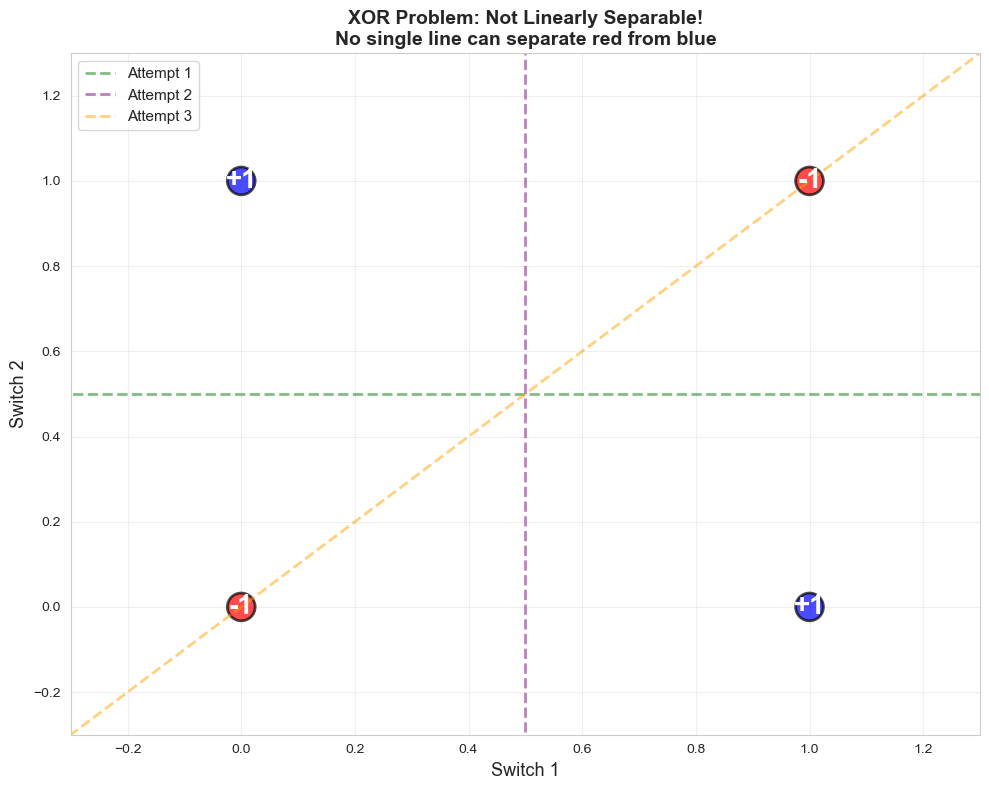

❌ XOR Problem: Perceptron cannot solve this!
   No single straight line can separate the classes.
   Solution: Use multiple perceptrons (Neural Networks!)


In [12]:
# Demonstrate XOR problem
X_xor = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y_xor = np.array([-1, 1, 1, -1])  # XOR pattern

plt.figure(figsize=(10, 8))

colors = ['red' if y == -1 else 'blue' for y in y_xor]
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=colors, s=400, alpha=0.7, edgecolors='black', linewidths=2)

for i, (x, y) in enumerate(zip(X_xor, y_xor)):
    label = '+1' if y == 1 else '-1'
    plt.text(x[0], x[1], label, fontsize=20, fontweight='bold',
            ha='center', va='center', color='white')

# Try to draw some separating lines (they all fail!)
x_line = np.linspace(-0.5, 1.5, 100)
plt.plot(x_line, 0.5 * np.ones_like(x_line), 'g--', linewidth=2, alpha=0.5, label='Attempt 1')
plt.plot(0.5 * np.ones_like(x_line), x_line, 'purple', linestyle='--', linewidth=2, alpha=0.5, label='Attempt 2')
plt.plot(x_line, x_line, 'orange', linestyle='--', linewidth=2, alpha=0.5, label='Attempt 3')

plt.xlabel('Switch 1', fontsize=13)
plt.ylabel('Switch 2', fontsize=13)
plt.title('XOR Problem: Not Linearly Separable!\nNo single line can separate red from blue', 
         fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim(-0.3, 1.3)
plt.ylim(-0.3, 1.3)

plt.tight_layout()
plt.show()

print("❌ XOR Problem: Perceptron cannot solve this!")
print("   No single straight line can separate the classes.")
print("   Solution: Use multiple perceptrons (Neural Networks!)")

---
## 🎓 Summary & Key Takeaways

### The Big Picture

1. **Machine Learning** = Learning patterns from data instead of programming rules
2. **Supervised Learning** = Learning with a teacher (labeled examples)
3. **Loss Functions** = Measuring how wrong we are
4. **k-NN** = "Birds of a feather flock together"
5. **Perceptron** = Linear decision boundary that learns from mistakes

### Algorithm Comparison

| Algorithm | Pros | Cons | Best For |
|-----------|------|------|----------|
| k-NN | Simple, no training, handles complex boundaries | Slow prediction, memory-hungry | Small datasets, complex patterns |
| Perceptron | Fast, online learning, interpretable | Only linear, needs separable data | Large datasets, linear problems |

### Mathematical Foundations

**k-NN Distance:**
```
d(x, x') = √(Σᵢ (xᵢ - x'ᵢ)²)
```

**Perceptron:**
```
f(x) = sign(w·x + b)
Update: w ← w + y·x, b ← b + y (when wrong)
```

**Loss Functions:**
```
L1: |y - ŷ|
L2: (y - ŷ)²
0-1: I(y ≠ ŷ)
```

---
## 📚 Further Reading & Resources

### Recommended Materials

1. **Visual Intuition:** 
   - Perceptron visualization: http://neuralnetworksanddeeplearning.com/

2. **Books:**
   - "Pattern Recognition and Machine Learning" - Christopher Bishop
   - "Understanding Machine Learning" - Shalev-Shwartz & Ben-David

3. **Historical Context:**
   - Perceptron was invented in 1958 by Frank Rosenblatt
   - k-NN is one of the oldest ML algorithms (1950s)

### Practice Tips

1. **Implement from scratch:** Code k-NN and Perceptron without libraries
2. **Visualize everything:** Plot decision boundaries, loss curves, training progress
3. **Experiment with hyperparameters:** Try different k values, learning rates
4. **Real datasets:** Apply to UCI ML Repository datasets

---

*Remember: Machine learning is about finding patterns in data. Start with the simplest approach that could work, understand why it succeeds or fails, then iterate. The math is a tool to formalize our intuitions!*

---
## Bonus: Interactive Playground

Create your own dataset and see how algorithms perform!

In [13]:
# Interactive playground for creating your own dataset
print("Interactive ML Playground")
print("="*60)
print("Instructions:")
print("1. Run this cell to generate random data")
print("2. Adjust parameters below to see how algorithms behave")
print("3. Try making data that's easy/hard for each algorithm\n")

def create_dataset(n_samples=40, separation=2.0, noise=0.5, seed=42):
    """
    Create a binary classification dataset.
    
    Parameters:
    - n_samples: number of points per class
    - separation: how far apart the classes are (higher = easier)
    - noise: how much randomness (higher = harder)
    - seed: random seed for reproducibility
    """
    np.random.seed(seed)
    
    # Class 1
    X1 = np.random.randn(n_samples, 2) * noise + np.array([separation, separation])
    y1 = np.ones(n_samples)
    
    # Class 2
    X2 = np.random.randn(n_samples, 2) * noise + np.array([-separation, -separation])
    y2 = -np.ones(n_samples)
    
    X = np.vstack([X1, X2])
    y = np.concatenate([y1, y2])
    
    return X, y

def compare_algorithms(n_samples=40, separation=2.0, noise=0.5, k=5, seed=42):
    """
    Compare k-NN and Perceptron on the same dataset.
    """
    X, y = create_dataset(n_samples, separation, noise, seed)
    
    # Train k-NN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Train Perceptron
    perc = Perceptron()
    for epoch in range(20):
        errors = 0
        for xi, yi in zip(X, y):
            if not perc.train_step(xi, yi):
                errors += 1
        if errors == 0:
            break
    
    # Create mesh for decision boundary
    h = 0.1
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # k-NN
    Z_knn = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_knn = Z_knn.reshape(xx.shape)
    
    axes[0].contourf(xx, yy, Z_knn, alpha=0.3, cmap='RdBu')
    axes[0].scatter(X[y==1, 0], X[y==1, 1], c='blue', s=100, alpha=0.7, 
                   edgecolors='black', label='Class +1')
    axes[0].scatter(X[y==-1, 0], X[y==-1, 1], c='red', s=100, alpha=0.7, 
                   edgecolors='black', label='Class -1')
    axes[0].set_title(f'k-NN (k={k})\nDecision Boundary', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Feature 1', fontsize=12)
    axes[0].set_ylabel('Feature 2', fontsize=12)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Perceptron
    if perc.w is not None and np.any(perc.w != 0):
        Z_perc = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], perc.w) + perc.b)
        Z_perc = Z_perc.reshape(xx.shape)
        
        axes[1].contourf(xx, yy, Z_perc, alpha=0.3, cmap='RdBu')
    
    axes[1].scatter(X[y==1, 0], X[y==1, 1], c='blue', s=100, alpha=0.7, 
                   edgecolors='black', label='Class +1')
    axes[1].scatter(X[y==-1, 0], X[y==-1, 1], c='red', s=100, alpha=0.7, 
                   edgecolors='black', label='Class -1')
    axes[1].set_title(f'Perceptron\nDecision Boundary', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Feature 1', fontsize=12)
    axes[1].set_ylabel('Feature 2', fontsize=12)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate accuracies
    knn_pred = knn.predict(X)
    knn_acc = np.mean(knn_pred == y) * 100
    
    perc_pred = np.array([perc.predict(xi) for xi in X])
    perc_acc = np.mean(perc_pred == y) * 100
    
    print(f"\n Results:")
    print(f"   k-NN Accuracy: {knn_acc:.1f}%")
    print(f"   Perceptron Accuracy: {perc_acc:.1f}%")
    print(f"\n Observations:")
    if separation > 3:
        print(f"   - High separation: Both algorithms should perform well!")
    elif separation < 1:
        print(f"   - Low separation: Data is overlapping - harder problem!")
    if noise > 1:
        print(f"   - High noise: k-NN might be more robust than perceptron")
    if knn_acc > perc_acc:
        print(f"   - k-NN wins! Might indicate non-linear boundary")
    elif perc_acc > knn_acc:
        print(f"   - Perceptron wins! Data is likely linearly separable")
    else:
        print(f"   - Tie! Both algorithms found good solutions")

# Create interactive widget
interact(compare_algorithms,
         n_samples=IntSlider(min=10, max=100, step=10, value=40, description='Samples:'),
         separation=FloatSlider(min=0.5, max=4.0, step=0.5, value=2.0, description='Separation:'),
         noise=FloatSlider(min=0.1, max=2.0, step=0.1, value=0.5, description='Noise:'),
         k=IntSlider(min=1, max=15, step=2, value=5, description='k (for k-NN):'),
         seed=IntSlider(min=0, max=100, step=1, value=42, description='Random Seed:'))

Interactive ML Playground
Instructions:
1. Run this cell to generate random data
2. Adjust parameters below to see how algorithms behave
3. Try making data that's easy/hard for each algorithm



interactive(children=(IntSlider(value=40, description='Samples:', min=10, step=10), FloatSlider(value=2.0, des…

<function __main__.compare_algorithms(n_samples=40, separation=2.0, noise=0.5, k=5, seed=42)>

###  Experiment Ideas

Try these experiments to deepen your understanding:

1. **Easy Dataset:** `separation=4.0, noise=0.3`
   - Both algorithms should get 100% accuracy
   - Perceptron finds a straight line, k-NN adapts to local patterns

2. **Noisy Dataset:** `separation=2.0, noise=1.5`
   - Classes overlap significantly
   - Which algorithm handles noise better?

3. **Small k vs Large k:** Keep data fixed, vary k from 1 to 15
   - k=1: Very jagged boundary (overfitting)
   - k=15: Very smooth boundary (underfitting)

4. **Effect of Sample Size:** `n_samples=10` vs `n_samples=100`
   - More data usually helps both algorithms
   - Perceptron converges faster with more examples

 Final Challenge: Non-Linear Dataset


C:\Users\yujua\AppData\Local\Temp\ipykernel_27020\1361235594.py:71: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


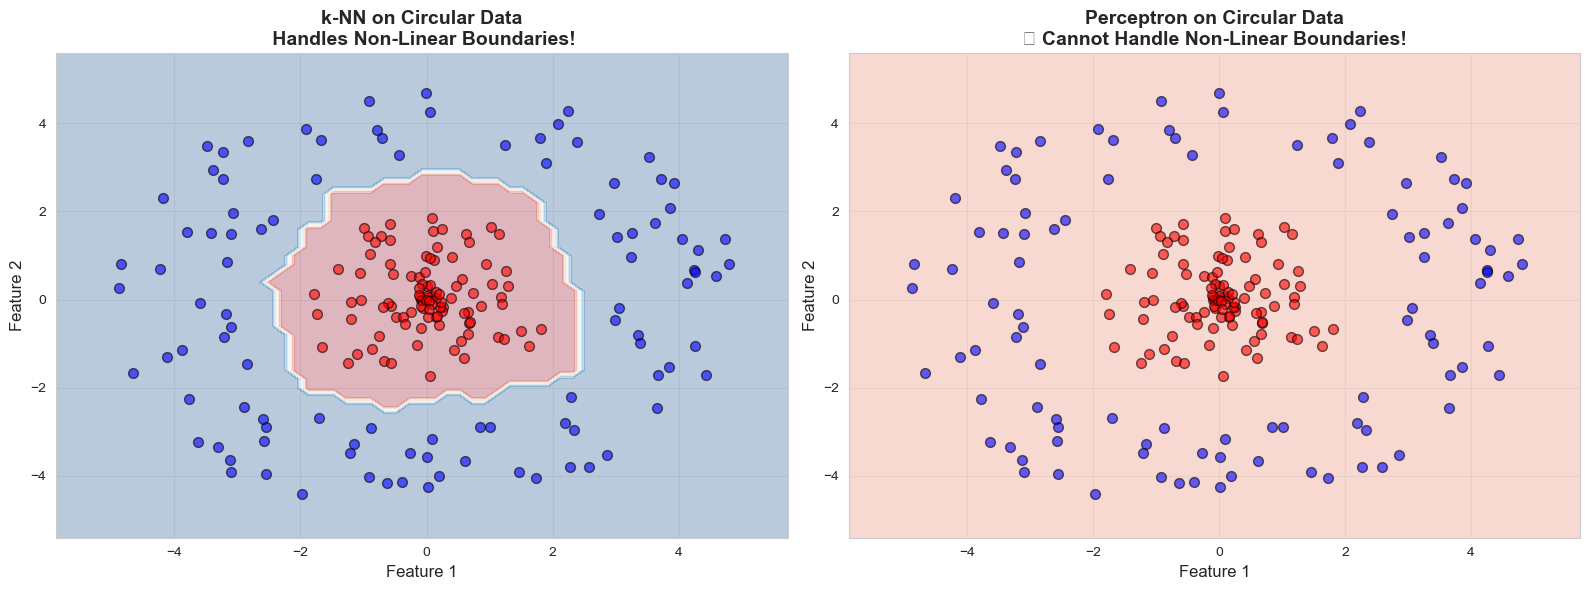


 Final Results on Circular Dataset:
   k-NN Accuracy: 100.0%
   Perceptron Accuracy: 50.0%

 Key Insight:
   k-NN can handle ANY shape boundary (non-parametric)
   Perceptron only handles linear boundaries (parametric)
   This is the fundamental trade-off in machine learning!


In [14]:
# Final Challenge: Create your own "XOR-like" non-linear dataset
print(" Final Challenge: Non-Linear Dataset")
print("="*60)

# Create circular/non-linear dataset
np.random.seed(42)
n = 100

# Inner circle (class -1)
r_inner = np.random.uniform(0, 2, n)
theta_inner = np.random.uniform(0, 2*np.pi, n)
X_inner = np.column_stack([r_inner * np.cos(theta_inner), r_inner * np.sin(theta_inner)])
y_inner = -np.ones(n)

# Outer ring (class +1)
r_outer = np.random.uniform(3, 5, n)
theta_outer = np.random.uniform(0, 2*np.pi, n)
X_outer = np.column_stack([r_outer * np.cos(theta_outer), r_outer * np.sin(theta_outer)])
y_outer = np.ones(n)

X_circle = np.vstack([X_inner, X_outer])
y_circle = np.concatenate([y_inner, y_outer])

# Try both algorithms
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# k-NN
knn_circle = KNeighborsClassifier(n_neighbors=5)
knn_circle.fit(X_circle, y_circle)

h = 0.2
x_min, x_max = X_circle[:, 0].min() - 1, X_circle[:, 0].max() + 1
y_min, y_max = X_circle[:, 1].min() - 1, X_circle[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z_knn = knn_circle.predict(np.c_[xx.ravel(), yy.ravel()])
Z_knn = Z_knn.reshape(xx.shape)

axes[0].contourf(xx, yy, Z_knn, alpha=0.3, cmap='RdBu')
axes[0].scatter(X_circle[y_circle==1, 0], X_circle[y_circle==1, 1], 
               c='blue', s=50, alpha=0.6, edgecolors='black')
axes[0].scatter(X_circle[y_circle==-1, 0], X_circle[y_circle==-1, 1], 
               c='red', s=50, alpha=0.6, edgecolors='black')
axes[0].set_title('k-NN on Circular Data\n Handles Non-Linear Boundaries!', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Feature 1', fontsize=12)
axes[0].set_ylabel('Feature 2', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Perceptron
perc_circle = Perceptron()
for epoch in range(20):
    for xi, yi in zip(X_circle, y_circle):
        perc_circle.train_step(xi, yi)

if perc_circle.w is not None:
    Z_perc = np.sign(np.dot(np.c_[xx.ravel(), yy.ravel()], perc_circle.w) + perc_circle.b)
    Z_perc = Z_perc.reshape(xx.shape)
    axes[1].contourf(xx, yy, Z_perc, alpha=0.3, cmap='RdBu')

axes[1].scatter(X_circle[y_circle==1, 0], X_circle[y_circle==1, 1], 
               c='blue', s=50, alpha=0.6, edgecolors='black')
axes[1].scatter(X_circle[y_circle==-1, 0], X_circle[y_circle==-1, 1], 
               c='red', s=50, alpha=0.6, edgecolors='black')
axes[1].set_title('Perceptron on Circular Data\n❌ Cannot Handle Non-Linear Boundaries!', 
                 fontsize=14, fontweight='bold')
axes[1].set_xlabel('Feature 1', fontsize=12)
axes[1].set_ylabel('Feature 2', fontsize=12)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

knn_pred = knn_circle.predict(X_circle)
knn_acc = np.mean(knn_pred == y_circle) * 100

perc_pred = np.array([perc_circle.predict(xi) for xi in X_circle])
perc_acc = np.mean(perc_pred == y_circle) * 100

print(f"\n Final Results on Circular Dataset:")
print(f"   k-NN Accuracy: {knn_acc:.1f}%")
print(f"   Perceptron Accuracy: {perc_acc:.1f}%")
print(f"\n Key Insight:")
print(f"   k-NN can handle ANY shape boundary (non-parametric)")
print(f"   Perceptron only handles linear boundaries (parametric)")
print(f"   This is the fundamental trade-off in machine learning!")

---
## Thank You!

### What You've Learned:

- The difference between traditional programming and machine learning  
- How supervised learning works (teacher-student paradigm)  
- Loss functions and why they matter (L1, L2, 0-1 loss)  
- k-Nearest Neighbors algorithm and when to use it
- Perceptron algorithm and its limitations  
- The difference between linear and non-linear boundaries  

### Key Takeaways:

1. **No Free Lunch:** Every algorithm has strengths and weaknesses
2. **Simplicity First:** Start with simple models (k-NN, Perceptron)
3. **Visualize Everything:** Understanding comes from seeing patterns
4. **Data Quality Matters:** Garbage in = Garbage out
5. **Linear vs Non-Linear:** Know what shape your problem has

### Next Steps:

- Practice implementing these algorithms from scratch
- Try them on real datasets (UCI ML Repository, Kaggle)
- Move on to Lecture 2: Bias-Variance Tradeoff
- Explore more complex models (SVMs, Neural Networks)

---